<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%8802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

In [ ]:
dia_df = pd.read_csv('/content/sample_data/diabetes.csv')
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(dia_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print(dia_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
print(dia_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(dia_df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


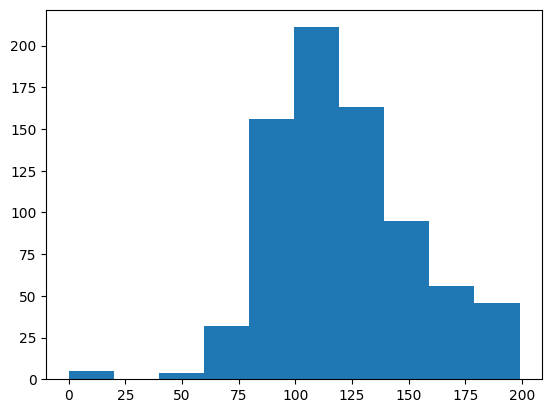

In [ ]:
plt.hist(dia_df['Glucose'])
plt.show()

In [ ]:
x=dia_df.iloc[:, :-1] # outcome 열을 제외한 모든 값
y = dia_df['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42,stratify=y)

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = model.predict(x_test)
predict_proba = model.predict_proba(x_test)[:,1]

In [ ]:
# 평가 함수 정의
def get_clf_eval(y_test, pred, predict_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall= recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,predict_proba)

    print(f'Confusion Matrix : {confusion}')
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall : {recall:.4f}")
    print(f"F1 : {f1:.4f}")
    print(f"ROC AUC : {roc_auc:.4f}")


get_clf_eval(y_test, y_pred, predict_proba)

Confusion Matrix : [[85 15]
 [27 27]]
Accuracy : 0.7273
Precision : 0.6429
Recall : 0.5000
F1 : 0.5625
ROC AUC : 0.8287


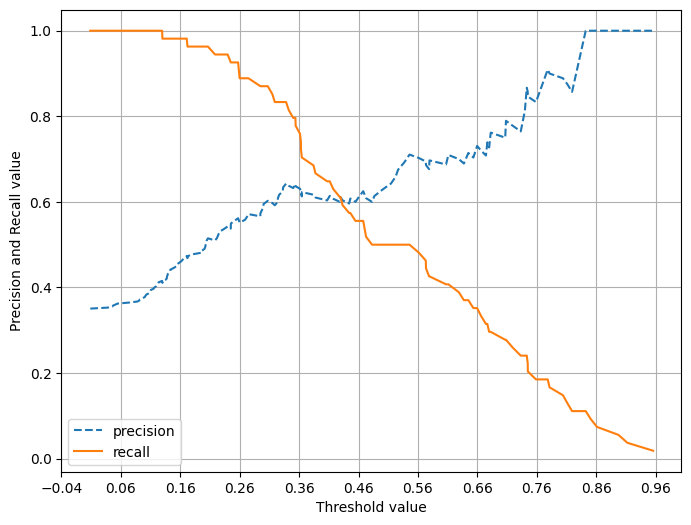

In [ ]:
#precision recall 커브 플롯 함수 정의
def precision_recall_curve_plot(y_test, predict_proba):
  precisions, recalls ,thresholds = precision_recall_curve(y_test, predict_proba)
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start , end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, predict_proba)

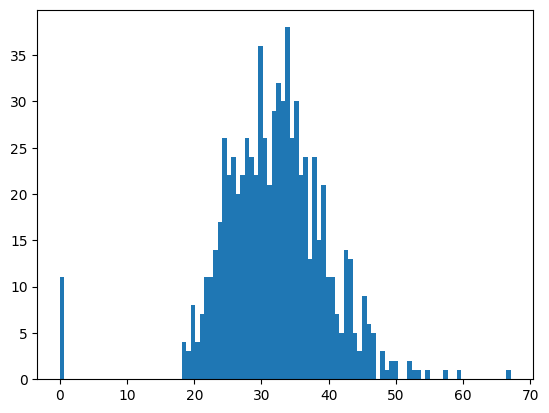

In [ ]:
plt.hist(dia_df['BMI'],bins=100)
plt.show()

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
total_count= dia_df['Glucose'].count()

for feature in zero_features:
  zero_count = dia_df[dia_df[feature]==0][feature].count()
  print(f'{feature} zero count : {zero_count}, {zero_count/total_count*100:.2f}%')

Glucose zero count : 5, 0.65%
BloodPressure zero count : 35, 4.56%
SkinThickness zero count : 227, 29.56%
Insulin zero count : 374, 48.70%
BMI zero count : 11, 1.43%


In [ ]:
mean_zero_feature = dia_df[zero_features].mean()
dia_df[zero_features] = dia_df[zero_features].replace(0, mean_zero_feature)

In [ ]:
X = dia_df.iloc[:, :-1]
y = dia_df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 모델 재학습 및 평가
model.fit(X_train, y_train)
pred = model.predict(X_test)
predict_proba = model.predict_proba(X_test)[:, -1]
get_clf_eval(y_test, pred, predict_proba)

Confusion Matrix : [[82 18]
 [27 27]]
Accuracy : 0.7078
Precision : 0.6000
Recall : 0.5000
F1 : 0.5455
ROC AUC : 0.8144


In [ ]:
thresholds = [0.2, 0.3, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]

def get_eval_by_threshold(y_test, predict_proba, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(predict_proba.reshape(-1, 1))
        custom_predict = binarizer.transform(predict_proba.reshape(-1, 1))
        get_clf_eval(y_test, custom_predict, predict_proba)

get_eval_by_threshold(y_test, predict_proba, thresholds)

Confusion Matrix : [[61 39]
 [ 6 48]]
Accuracy : 0.7078
Precision : 0.5517
Recall : 0.8889
F1 : 0.6809
ROC AUC : 0.8144
Confusion Matrix : [[72 28]
 [11 43]]
Accuracy : 0.7468
Precision : 0.6056
Recall : 0.7963
F1 : 0.6880
ROC AUC : 0.8144
Confusion Matrix : [[76 24]
 [17 37]]
Accuracy : 0.7338
Precision : 0.6066
Recall : 0.6852
F1 : 0.6435
ROC AUC : 0.8144
Confusion Matrix : [[78 22]
 [19 35]]
Accuracy : 0.7338
Precision : 0.6140
Recall : 0.6481
F1 : 0.6306
ROC AUC : 0.8144
Confusion Matrix : [[78 22]
 [23 31]]
Accuracy : 0.7078
Precision : 0.5849
Recall : 0.5741
F1 : 0.5794
ROC AUC : 0.8144
Confusion Matrix : [[79 21]
 [24 30]]
Accuracy : 0.7078
Precision : 0.5882
Recall : 0.5556
F1 : 0.5714
ROC AUC : 0.8144
Confusion Matrix : [[80 20]
 [25 29]]
Accuracy : 0.7078
Precision : 0.5918
Recall : 0.5370
F1 : 0.5631
ROC AUC : 0.8144
Confusion Matrix : [[82 18]
 [27 27]]
Accuracy : 0.7078
Precision : 0.6000
Recall : 0.5000
F1 : 0.5455
ROC AUC : 0.8144
